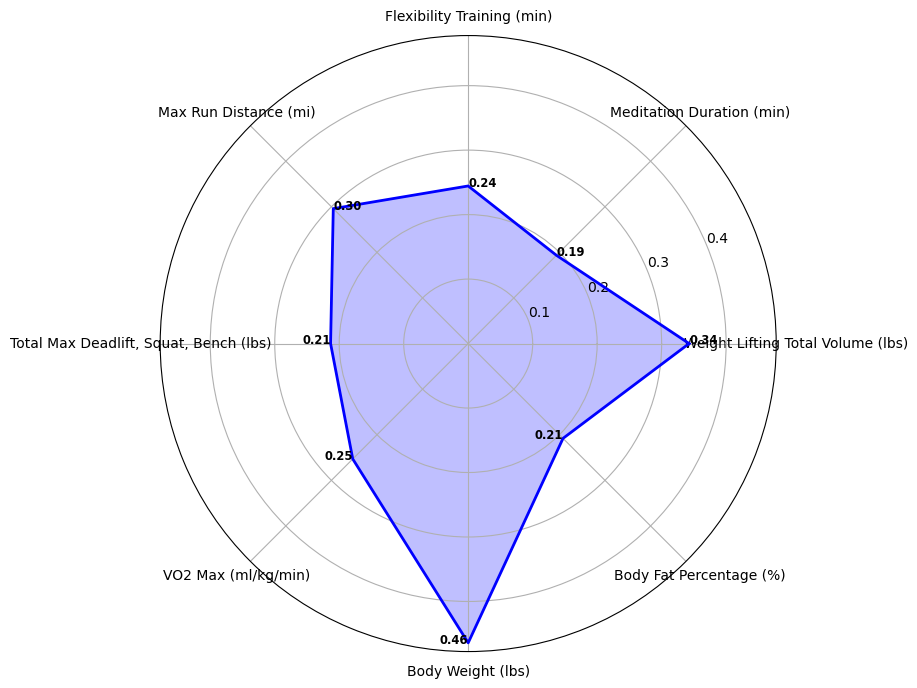

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Desktop/Simulated Fitness Dataset.csv'
df = pd.read_csv(file_path)

# Fill NaNs with 0 (or another strategy as needed)
df_filled = df.fillna(0)

# Extract numeric columns, excluding the 'Date' column
numeric_columns = df_filled.select_dtypes(include=np.number).columns
numeric_df = df_filled[numeric_columns]

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_df)
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# Calculate the mean of the normalized data for each column (as an example)
mean_values = normalized_df.mean()

# Create Radar Chart
labels = np.array(mean_values.index)
num_vars = len(labels)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end.
values = mean_values.tolist()
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Labels for each point
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Adding the values as annotations on each axis
for label, angle, value in zip(labels, angles, mean_values):
    if np.isfinite(value):
        # Adjust text alignment based on angle
        alignment = 'left' if 0 <= angle < np.pi else 'right'
        ax.text(angle, value, f'{value:.2f}', horizontalalignment=alignment, size='small', color='black', weight='semibold')

plt.show()